El siguiente es un circuito RL conectado a una batería ideal.

![imagen.png](attachment:imagen.png)

Haciendo Ley de mallas de Kirchoff, se obtiene la siguiente ecuación en términos de la corriente:

\begin{equation}
10-5\times 10^{3}I - 0.1\frac{dI}{dt} = 0
\end{equation}

Como condición inicial se tiene que $I(0) = 0$.

Obtenga la ecuación diferencial para la corriente y resuelva utilizando método de Runge-Kutta (**no es necesario usar Runge-Kutta-Fehlberg**). Haga la gráfica de la función $I(t)$ en un intervalo de tiempo donde sea apreciable su comportamiento.

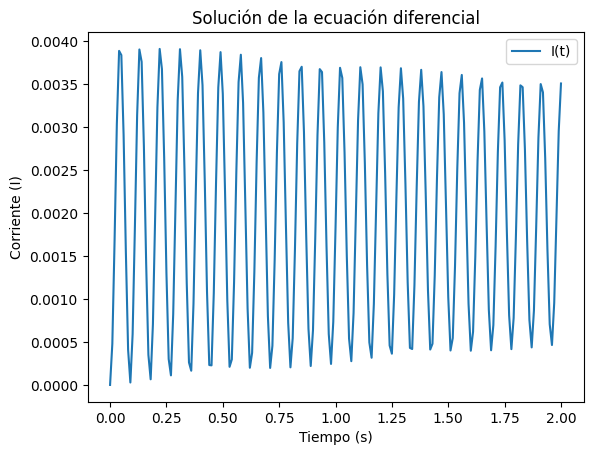

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t, y):
    I, V = y
    dIdt = V
    dVdt = 10 - 5 * 10**3 * I - 0.1 * V
    return [dIdt, dVdt]


def runge_kutta(h, t_span, y0):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = []

    y = np.array(y0)

    for t in t_values:
        y_values.append(y[0])
        k1 = np.multiply(h, f(t, y))
        k2 = np.multiply(h, f(t + 0.5 * h, y + 0.5 * k1))
        k3 = np.multiply(h, f(t + 0.5 * h, y + 0.5 * k2))
        k4 = np.multiply(h, f(t + h, y + k3))
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, y_values

# Parámetros
h = 0.01
t_span = [0, 2]
y0 = [0, 0]
t_values, I_values = runge_kutta(h, t_span, y0)


plt.plot(t_values, I_values, label='I(t)')
plt.title('Solución de la ecuación diferencial')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (I)')
plt.legend()
plt.show()